# GRIP @ The Sparks Foundation

## Coder : VISHWA R. PATEL ( Data Science & Business Analytics Intern )

## Task 2 : Color Identification In Images ( Computer Vision Domain )

## ( Level - Beginner )

<b style='font-size:18px'>Problem Statement</b>
<br><br>
<li>
    Implement an image color detector which identifies all the colors in an image or video.
</li>

## Import all required libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Applying Various OpenCV functions

The type of this input is <class 'numpy.ndarray'>
Shape: (1800, 2880, 3)


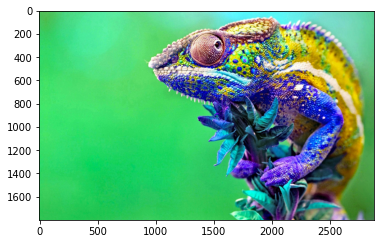

In [2]:
image = cv2.imread('../The Sparks Foundation Tasks/Img/chameleons.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## BGR to RGB Image Conversion

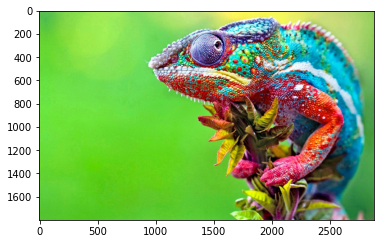

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## BGR to Grayscale Image Conversion

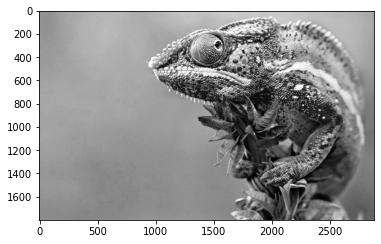

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## RBG to HEX Conversion Function

In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## Function For Fetching Image in RGB Colorspace

In [6]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## Fetching Colors From Images

In [7]:
def get_colors(image, number_of_colors, show_chart):
    
 modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
 modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
 clf = KMeans(n_clusters = number_of_colors)
 labels = clf.fit_predict(modified_image)
    
 counts = Counter(labels)

 center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
 ordered_colors = [center_colors[i] for i in counts.keys()]
 hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
 rgb_colors = [ordered_colors[i] for i in counts.keys()]

 if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

 return rgb_colors

## Image Dict For Further Color Searching

In [8]:
IMAGE_DIRECTORY = 'IMAGES'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED' : [255, 0, 0],
    'PURPLE' : [128, 0, 128]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

## Plot List Of Several Images

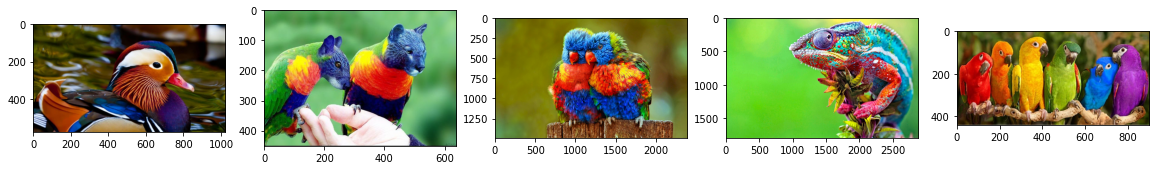

In [9]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

## Function For Matching Image By Different Colors

In [10]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

## Function For Showing Selected Images

In [11]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

## Search Images Which Contain Purple Color

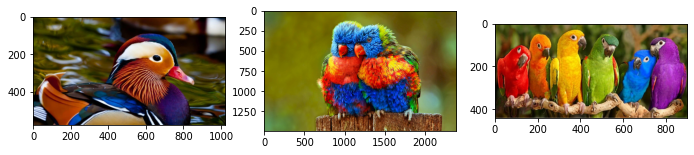

In [12]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['PURPLE'], 60, 5)

## Search Images Which Contain Blue Color

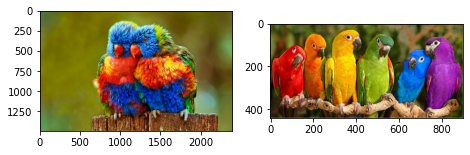

In [13]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

## Search Images Which Contain Red Color

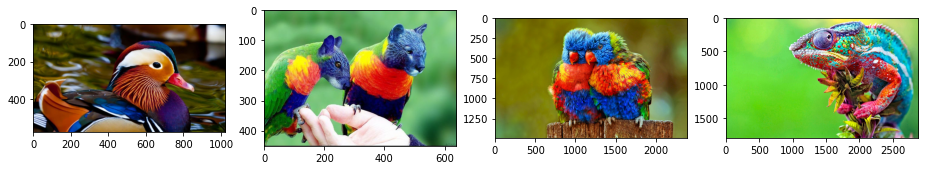

In [14]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

## Search Images Which Contain Green Color

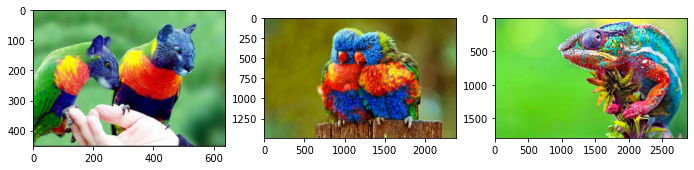

In [15]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

## Search Images Which Contain Yellow Color

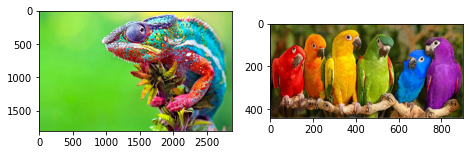

In [16]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

## Get All Colors From Chameleons Image

[array([143.76470097, 221.99632476,  90.51340628]),
 array([223.45775688, 100.79220954, 106.98817999]),
 array([ 65.75854281, 146.54968578,  76.0115868 ]),
 array([216.36293199, 224.4876399 , 229.4115115 ]),
 array([54.28837402, 24.71734933, 21.93111295]),
 array([36.01208501, 62.95110432, 90.43075427]),
 array([169.22131599,  27.46732062,  27.96120357]),
 array([ 94.40145728, 205.97637503,  37.44166248]),
 array([ 12.59528851, 137.51879301, 155.24007411]),
 array([185.20140075, 163.28886232,  16.86453707]),
 array([126.79995625, 116.35852565, 129.71453571]),
 array([106.80150396, 220.12365919,  65.50089199]),
 array([ 17.94387981, 193.8073354 , 210.8781853 ]),
 array([209.97277692, 223.52848643, 114.21053061]),
 array([153.55744504, 182.24222314, 193.89879718]),
 array([114.19879327,  75.74579232,  46.31803747])]

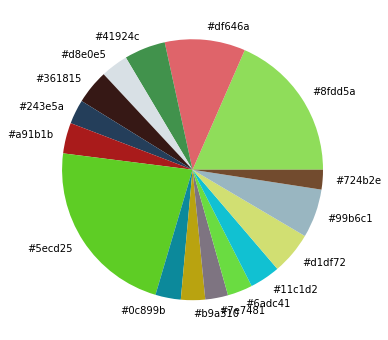

In [21]:
get_colors(get_image('../The Sparks Foundation Tasks/Img/chameleons.jpg'),16 , True)

## Applying Some OpenCV functions

The type of this input is <class 'numpy.ndarray'>
Shape: (1800, 2880, 3)


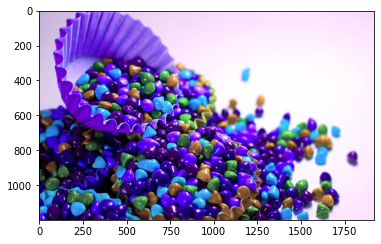

In [22]:
image1 = cv2.imread('../The Sparks Foundation Tasks/Img/Gems.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image1)

## BGR to RGB Image Conversion

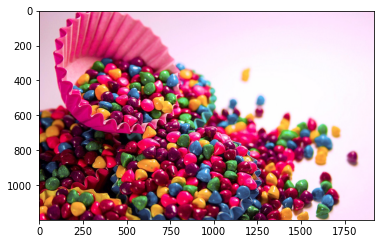

In [23]:
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

## Get All Colors From Gems Image

[array([43.0625666 , 57.75886741, 89.90044147]),
 array([133.83017591,  10.22713126,  48.86738836]),
 array([29.05977949, 10.94544643, 13.45847938]),
 array([188.64844973,  10.7395083 ,  72.78343251]),
 array([241.3931956 , 167.03970811,  62.63002274]),
 array([238.17476425, 117.51517015, 157.74272243]),
 array([69.49397734, 98.77078116, 50.75420394]),
 array([253.48396101, 239.78453198, 253.30786089]),
 array([ 65.89311755, 101.74711008, 144.56998044]),
 array([85.58562169,  5.88126105, 28.63741897]),
 array([233.26723504,   8.99338527,  98.69579597]),
 array([189.04216677, 104.71288692,  46.42672142]),
 array([ 98.25321438, 167.72185778, 205.22881134]),
 array([232.89164461, 193.49769376, 207.70661626]),
 array([103.36860987, 180.44730942,  97.56210762]),
 array([224.98486958,  70.00575513, 125.03081779])]

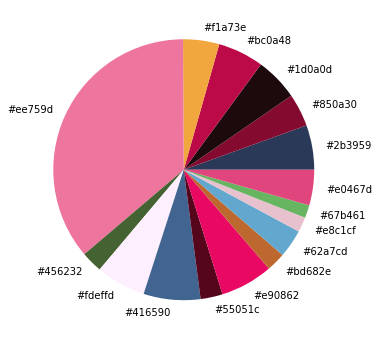

In [24]:
get_colors(get_image('../The Sparks Foundation Tasks/Img/Gems.jpg'),16 , True)

## Task 2 Completed Successfully

# Thank You